# SAD - Project 1

In [806]:
library(ggplot2)
library(glue)
library(gridExtra)
library(dplyr)
library(readr)
library(zeallot)
library(lubridate)
library("rlang")
library("tidyverse")

### Problem 1.1 - Inflation in Euro Zone vs Others

In [807]:
# Importing data
inf_data <- read.csv("data/EU_Inflation_HICP_data_mod.csv", header = TRUE, sep = ",")
dep_data <- read.csv("data/EU_deposits_1yr_data_mod.csv", header = TRUE, sep = ",")

# Converting date features
inf_data$Period <- as.Date(inf_data$Period,
                                 format = "%d/%m/%Y")

dep_data$Period <- as.Date(dep_data$Period,
                               format = "%d/%m/%Y")

In [808]:
# Wybrane daty i ich indeksy
# 21 - 01.02.2021
# 17 - 01.06.2021
# 9 - 01.02.2022
# 3 - 01.08.2021

# Divide into euro zone and not-euro zone
euro_zone_inf <-inf_data[ , c(1:3,5,8,10:14,17:23,25,28,29)]
not_euro_zone_inf <-inf_data[ , c(1,4,6,9,15,16,24,26,27)]

euro_zone_inf$EuroZoneMean <- rowMeans(euro_zone_inf[ ,-1], na.rm = TRUE)
not_euro_zone_inf$NotEuroZoneMean <- rowMeans(not_euro_zone_inf[ ,-1], na.rm = TRUE)
euro_zone_inf$EuroZoneSd <- apply(euro_zone_inf[ ,c(2:20)],1,sd)
not_euro_zone_inf$NotEuroZoneSd <- apply(not_euro_zone_inf[ ,c(2:9)],1,sd)

one_data_frame <- merge(x = euro_zone_inf[ , c(1,21,22)], y = not_euro_zone_inf[ , c(1,7,10,11)], by = "Period", all = TRUE)
one_data_frame <-one_data_frame[rev(order(one_data_frame$Period)), ]

inf_data_2 = one_data_frame

one_data_frame <- one_data_frame[c(3,9,17,21), ]
colors <- c("Not Euro Zone" = "green", "Euro Zone" = "blue", "Poland" = "red")

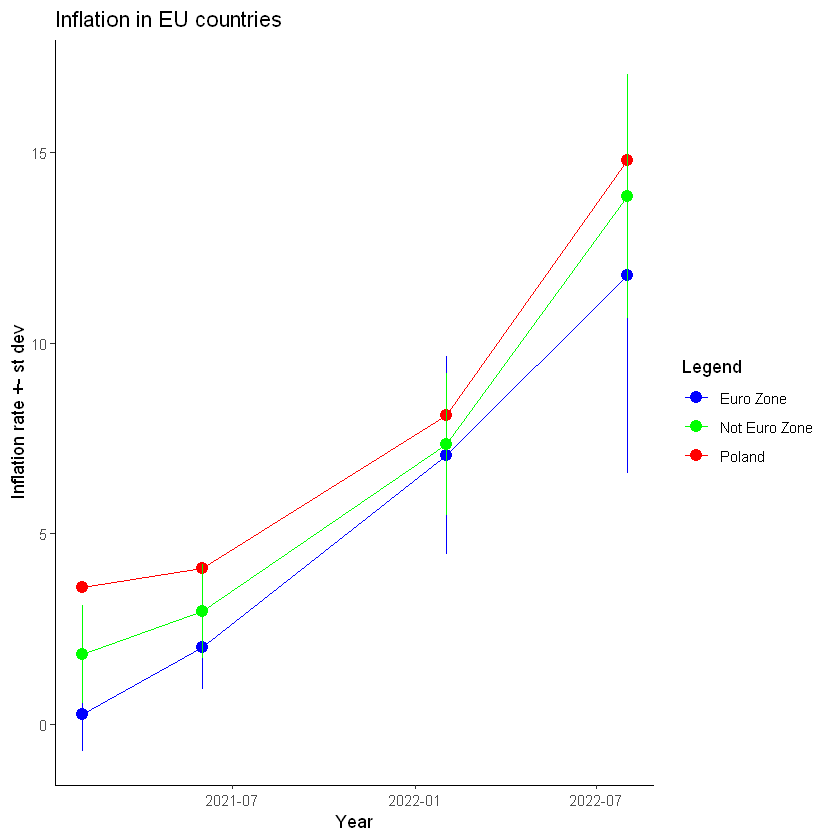

In [809]:
#All plots 
ggplot(data = one_data_frame) + 
  geom_point(size = 3, aes(x=Period, y=EuroZoneMean, colour = "Euro Zone")) + geom_line(aes(x=Period, y=EuroZoneMean, colour = "Euro Zone")) +
  geom_errorbar(aes(x=Period,ymin=EuroZoneMean-EuroZoneSd, ymax=EuroZoneMean+EuroZoneSd, colour = "Euro Zone"), width=.2,position=position_dodge(0.05)) +
  geom_point(size = 3, aes(x=Period, y=Poland, colour = "Poland")) + geom_line(aes(x=Period, y=Poland, colour = "Poland")) +
  geom_point(size = 3, aes(x=Period, y=NotEuroZoneMean, colour = "Not Euro Zone")) + geom_line(aes(x=Period, y=NotEuroZoneMean, colour = "Not Euro Zone")) +
  geom_errorbar(aes(x=Period,ymin=NotEuroZoneMean-NotEuroZoneSd, ymax=NotEuroZoneMean+NotEuroZoneSd, colour = "Not Euro Zone"), width=.2,position=position_dodge(0.05)) +
  theme_classic() +labs(title = "Inflation in EU countries", x = "Year", y = "Inflation rate +- st dev", colour = "Legend") +
  scale_color_manual(values = colors)

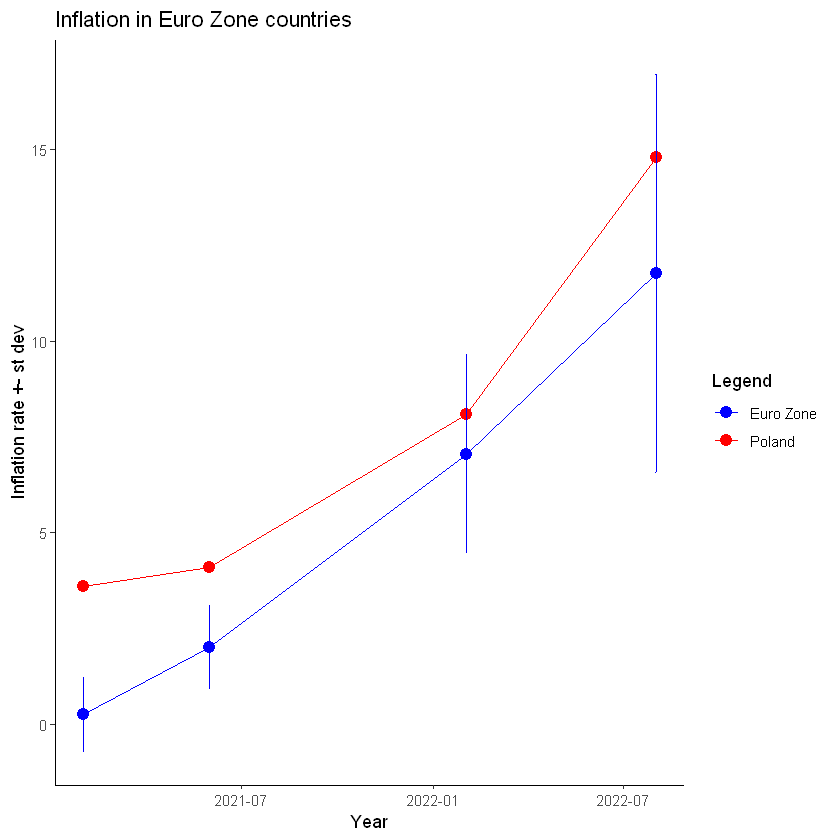

In [810]:
#Euro zone and Poland on one plot
ggplot(data = one_data_frame) + 
  geom_point(size = 3, aes(x=Period, y=Poland, colour = "Poland")) + geom_line(aes(x=Period, y=Poland, colour = "Poland")) +
  geom_point(size = 3, aes(x=Period, y=EuroZoneMean, colour = "Euro Zone")) + geom_line(aes(x=Period, y=EuroZoneMean, colour = "Euro Zone")) +
  geom_errorbar(aes(x=Period, ymin=EuroZoneMean-EuroZoneSd, ymax=EuroZoneMean+EuroZoneSd, colour = "Euro Zone"), width=.2,position=position_dodge(0.05)) +
  theme_classic() +labs(title = "Inflation in Euro Zone countries", x = "Year", y = "Inflation rate +- st dev", colour = "Legend") +
  scale_color_manual(values = colors)

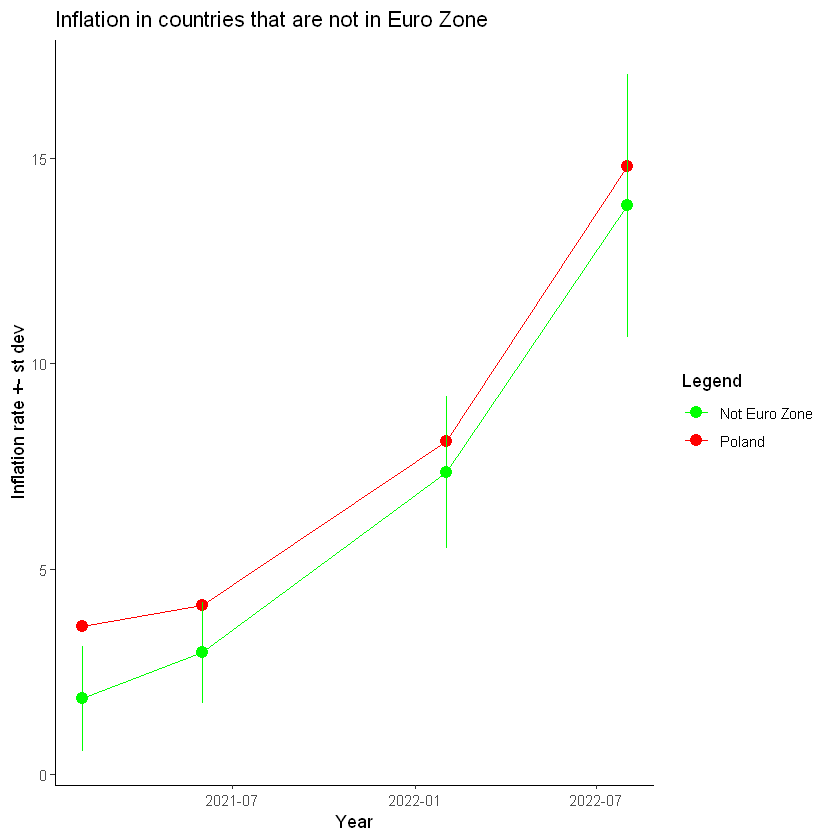

In [811]:
#Poland and not in euro zone countries in one plot
ggplot(data = one_data_frame) + 
  geom_point(size = 3, aes(x=Period, y=Poland, colour = "Poland")) + geom_line(aes(x=Period, y=Poland, colour = "Poland")) +
  geom_point(size = 3, aes(x=Period, y=NotEuroZoneMean, colour = "Not Euro Zone")) + geom_line(aes(x=Period, y=NotEuroZoneMean, colour = "Not Euro Zone")) +
  geom_errorbar(aes(x=Period,ymin=NotEuroZoneMean-NotEuroZoneSd, ymax=NotEuroZoneMean+NotEuroZoneSd, colour = "Not Euro Zone"), width=.2,position=position_dodge(0.05)) +
  theme_classic() +labs(title = "Inflation in countries that are not in Euro Zone", x = "Year", y = "Inflation rate +- st dev", colour = "Legend") +
  scale_color_manual(values = colors)

In [812]:
euro_zone_inf <-inf_data[ , c(1:3,5,8,10:14,17:23,25,28,29)]
not_euro_zone_inf <-inf_data[ , c(1,4,6,9,15,16,24,26,27)]

euro_zone_box <- data.frame(t(euro_zone_inf[21, -1]),t(euro_zone_inf[17, -1]),t(euro_zone_inf[7, -1]),t(euro_zone_inf[3, -1]))
not_euro_zone_box <- data.frame(t(not_euro_zone_inf[21, -1]),t(not_euro_zone_inf[9, -1]),t(not_euro_zone_inf[7, -1]),t(not_euro_zone_inf[3, -1]))

colnames(euro_zone_box)[1]<-"01.02.2021" 
colnames(euro_zone_box)[2]<-"01.06.2021" 
colnames(euro_zone_box)[3]<-"01.02.2022" 
colnames(euro_zone_box)[4]<-"01.08.2022"

colnames(not_euro_zone_box)[1]<-"01.02.2021" 
colnames(not_euro_zone_box)[2]<-"01.06.2021" 
colnames(not_euro_zone_box)[3]<-"01.02.2022" 
colnames(not_euro_zone_box)[4]<-"01.08.2022"

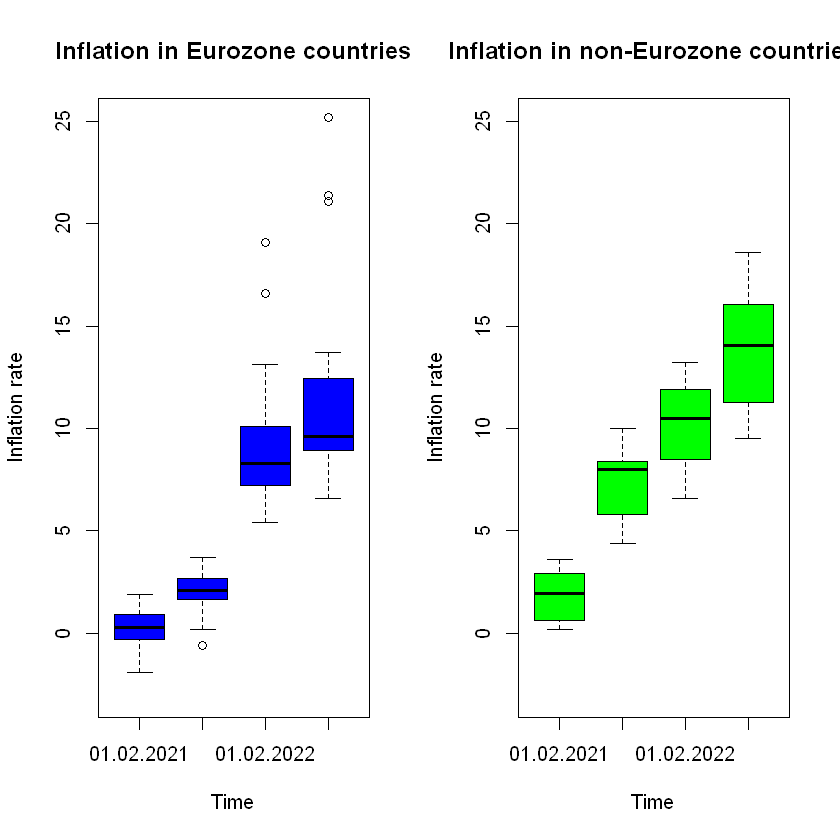

In [813]:
#Box plots 
par(mfrow=c(1,2))
boxplot(euro_zone_box, main= "Inflation in Eurozone countries", xlab = "Time", ylab = "Inflation rate", col = "blue", border = "black", ylim = c(-3,25))
boxplot(not_euro_zone_box, main= "Inflation in non-Eurozone countries", xlab = "Time", ylab = "Inflation rate", col = "green", border = "black", ylim = c(-3,25))

### Problem 1.2 - Deposits percentage vs inflation

In [814]:
# Importing data
options(readr.show_col_types = FALSE)

inflation_data <- read_csv("data/EU_Inflation_HICP_data.csv", skip=2)
deposits_data <- read_csv("data/EU_deposits_1yr_data.csv", skip=2)

colnames(deposits_data) <- make.names(colnames(deposits_data))
colnames(inflation_data) <- make.names(colnames(inflation_data))

# Cleaning data
colnames(deposits_data)[1] <- "Period"
colnames(inflation_data)[1] <- "Period"

deposits_data <- deposits_data[c(-1, -2), ]
inflation_data <- inflation_data[c(-1, -2), ]

New names:
• `` -> `...1`
New names:
• `` -> `...1`


In [815]:
#remove unwanted column
trash_index = grep("EU..changing.composition.", colnames(inflation_data))
inflation_data <- inflation_data[-trash_index]

In [816]:
head(inflation_data, n=3)
head(deposits_data, n=3)

Period,Austria,Belgium,Bulgaria,Cyprus,Czech.Republic,Germany,Denmark,Estonia,Spain,⋯,Luxembourg,Latvia,Malta,Netherlands,Poland,Portugal,Romania,Sweden,Slovenia,Slovakia
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2022Oct,11.5,13.1,NA,8.6,NA,11.6,NA,22.4,7.3,⋯,8.8,21.8,7.5,16.8,NA,10.6,NA,NA,10.3,14.5
2022Sep,10.9,12.1,15.6,9.0,17.8,10.9,11.1,24.1,9.0,⋯,8.8,22.0,7.4,17.1,15.7,9.8,13.4,10.3,10.6,13.6
2022Aug,9.3,10.5,15.0,9.6,17.1,8.8,9.9,25.2,10.5,⋯,8.6,21.4,7.0,13.7,14.8,9.3,13.3,9.5,11.5,13.4


Period,Austria..Euro,Belgium..Euro,Bulgaria..Bulgarian.lev,Cyprus..Euro,Czech.Republic..Czech.koruna,Germany..Euro,Denmark..Danish.krone,Estonia..Estonian.kroon,Estonia..Euro,⋯,Malta..Maltese.lira,Netherlands..Euro,Poland..Polish.zloty,Portugal..Euro,Romania..Romanian.leu,Sweden..Swedish.krona,Slovenia..Euro,Slovenia..Slovenian.tolar,Slovakia..Euro,Slovakia..Slovak.koruna
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2022Sep,0.8,0.84,0.12,0.11,6.1,0.84,1.15,NA,0.94,⋯,NA,1.84,5.44,0.05,6.44,1.65,0.11,NA,0.77,NA
2022Aug,0.37,0.37,0.11,0.06,5.98,0.49,0.25,NA,0.83,⋯,NA,1.53,5.22,0.07,6.22,1.21,0.04,NA,0.48,NA
2022Jul,0.23,0.11,0.09,0.05,5.95,0.31,-0.44,NA,0.59,⋯,NA,1.59,4.85,0.09,5.49,0.9,0.03,NA,0.21,NA


In [817]:
#split deposits to eurozone and not eurozone countries
eurozone_countries <- select(deposits_data, matches("Euro|Period"))
other_countries<- deposits_data[setdiff(names(deposits_data), names(eurozone_countries))]
other_countries <- cbind(deposits_data[ , 1], other_countries)

In [818]:
#initialize time boundries
pre_pandemic <- "2019Mar"
pandemic <- "2020Mar"
year_pandemic <- "2021Mar"
attack_on_ukraine <- "2022Mar"
now <- "2022Sep"

In [819]:
#keep data only between our periods
cut_data <- function(data){
    data <- data[which(data$Period == pre_pandemic):which(data$Period == now), ]
    return(data)
}

#keep data only between out periods
data_to_time_intervals <- function(data){
    pre_pandemic_inf<- data[which(data$Period == pre_pandemic):which(data$Period == pandemic), ]
    year_pandemic_inf <- data[which(data$Period == pandemic):which(data$Period == year_pandemic), ]
    pre_attack_inf <- data[which(data$Period == year_pandemic):which(data$Period == attack_on_ukraine), ]
    after_attack_inf <- data[which(data$Period == attack_on_ukraine):which(data$Period == now), ]
    list_of_intervals <- list(pre_pandemic_inf, year_pandemic_inf, pre_attack_inf, after_attack_inf)
    return(list_of_intervals)
}

In [820]:
#keep only interesting data
inflation_data <- cut_data(inflation_data)
deposits_data <- cut_data(deposits_data)

In [821]:
#check which countires has no "na" values
deposits_data %>%
  summarise_all(funs(sum(is.na(.))))
inflation_data %>%
  summarise_all(funs(sum(is.na(.))))

Period,Austria..Euro,Belgium..Euro,Bulgaria..Bulgarian.lev,Cyprus..Euro,Czech.Republic..Czech.koruna,Germany..Euro,Denmark..Danish.krone,Estonia..Estonian.kroon,Estonia..Euro,⋯,Malta..Maltese.lira,Netherlands..Euro,Poland..Polish.zloty,Portugal..Euro,Romania..Romanian.leu,Sweden..Swedish.krona,Slovenia..Euro,Slovenia..Slovenian.tolar,Slovakia..Euro,Slovakia..Slovak.koruna
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,43,0,⋯,43,0,0,0,0,0,0,43,0,43


Period,Austria,Belgium,Bulgaria,Cyprus,Czech.Republic,Germany,Denmark,Estonia,Spain,⋯,Luxembourg,Latvia,Malta,Netherlands,Poland,Portugal,Romania,Sweden,Slovenia,Slovakia
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [822]:
#select countries
new_columns_inf <- c("Period", "Austria", "Germany", "Romania", "Poland")
new_columns_dep <- c("Period", "Austria..Euro", "Germany..Euro", "Romania..Romanian.leu", "Poland..Polish.zloty")

new_inf_data <- inflation_data[new_columns_inf]
new_dep_data <- deposits_data[new_columns_dep]

In [823]:
#divide deposits by inflation with a specific offset to avoid "inf" values
new_inf_data <- mutate_all(new_inf_data[-1], function(x) as.numeric(as.character(x)))
new_dep_data <- mutate_all(new_dep_data[-1], function(x) as.numeric(as.character(x)))

#offset to avoid dividing by zero and negative values
offset <- 3
dep_by_inf <- round((new_dep_data + offset)/(new_inf_data + offset),3)
                           
dep_by_inf <- cbind(inflation_data[1], dep_by_inf)                
new_inf_data <- cbind(inflation_data[1], new_inf_data)
new_dep_data <- cbind(deposits_data[1], new_dep_data)
                           
head(dep_by_inf, 3)

,Period,Austria..Euro,Germany..Euro,Romania..Romanian.leu,Poland..Polish.zloty
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019Mar,0.689,0.748,0.635,0.974
2,2019Apr,0.681,0.645,0.620,0.894
3,2019May,0.679,0.728,0.627,0.869


In [824]:
#convert divided data dep_by_inf to time intervals, then transform to clean data
list_div_intervals %<-% data_to_time_intervals(dep_by_inf)
for (i in 1:4){
    list_div_intervals[[i]] <- list_div_intervals[[i]] %>% pivot_longer(-Period, names_to = "country", values_to = "ratio")
}

In [825]:
#get time intervals data
c(pre_pandemic, pandemic, year_pandemic, attack_on_ukraine) %<-% list_div_intervals
head(pre_pandemic, 3)

Period,country,ratio
<chr>,<chr>,<dbl>
2019Mar,Austria..Euro,0.689
2019Mar,Germany..Euro,0.748
2019Mar,Romania..Romanian.leu,0.635


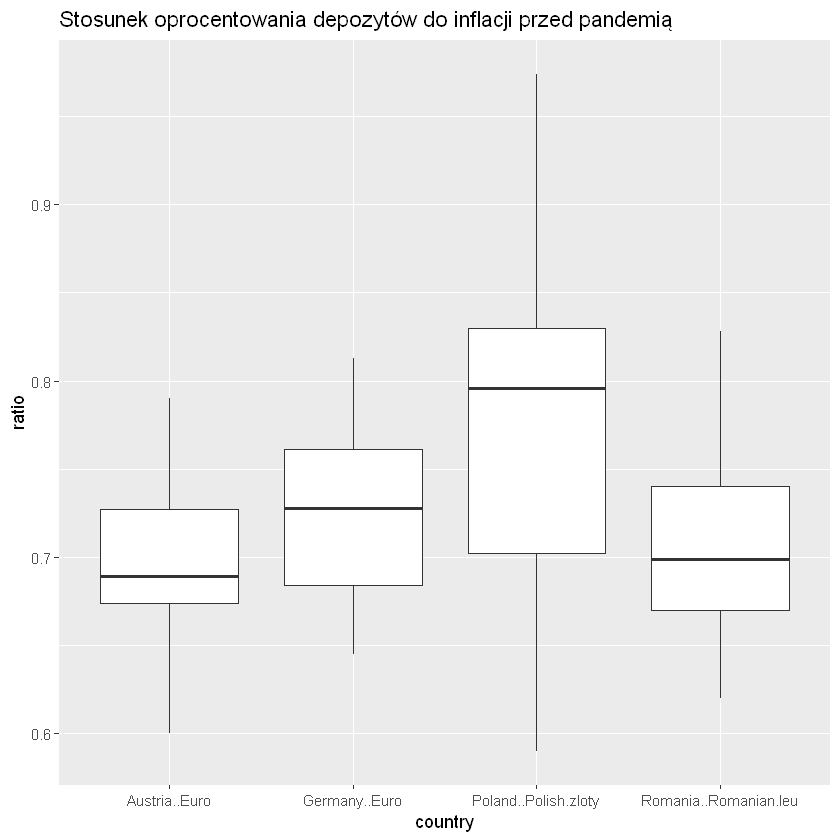

In [826]:
pre_pandemic %>%
    ggplot(aes(country, ratio))+
    geom_boxplot()+
    ggtitle("Stosunek oprocentowania depozytów do inflacji przed pandemią")

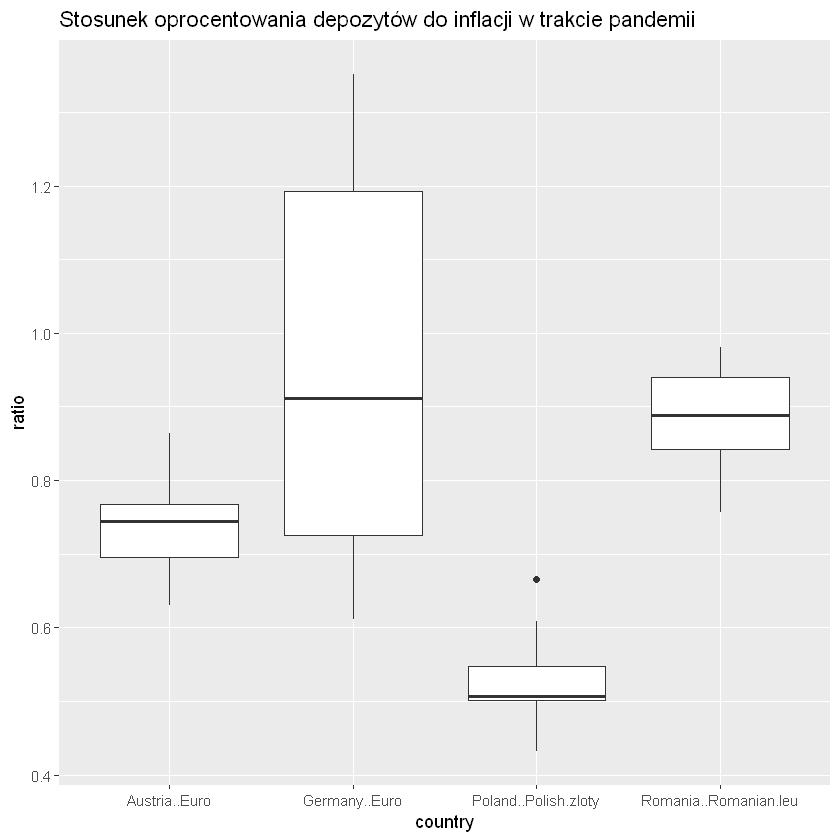

In [827]:
pandemic %>%
    ggplot(aes(country, ratio))+
    geom_boxplot()+
    ggtitle("Stosunek oprocentowania depozytów do inflacji w trakcie pandemii")

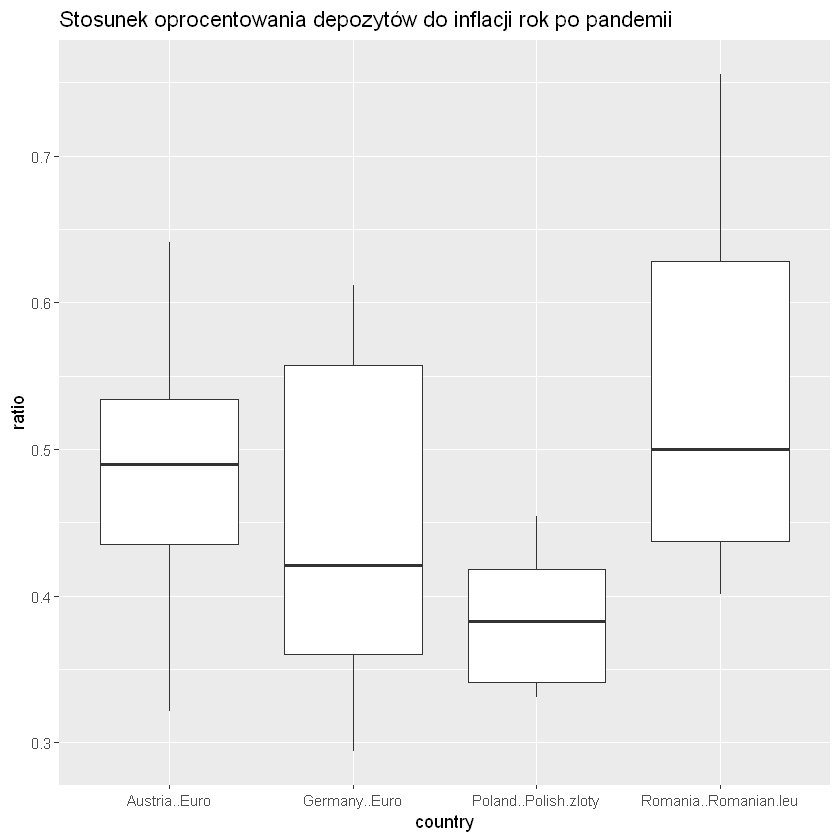

In [828]:
year_pandemic %>%
    ggplot(aes(country, ratio))+
    geom_boxplot()+
    ggtitle("Stosunek oprocentowania depozytów do inflacji rok po pandemii")

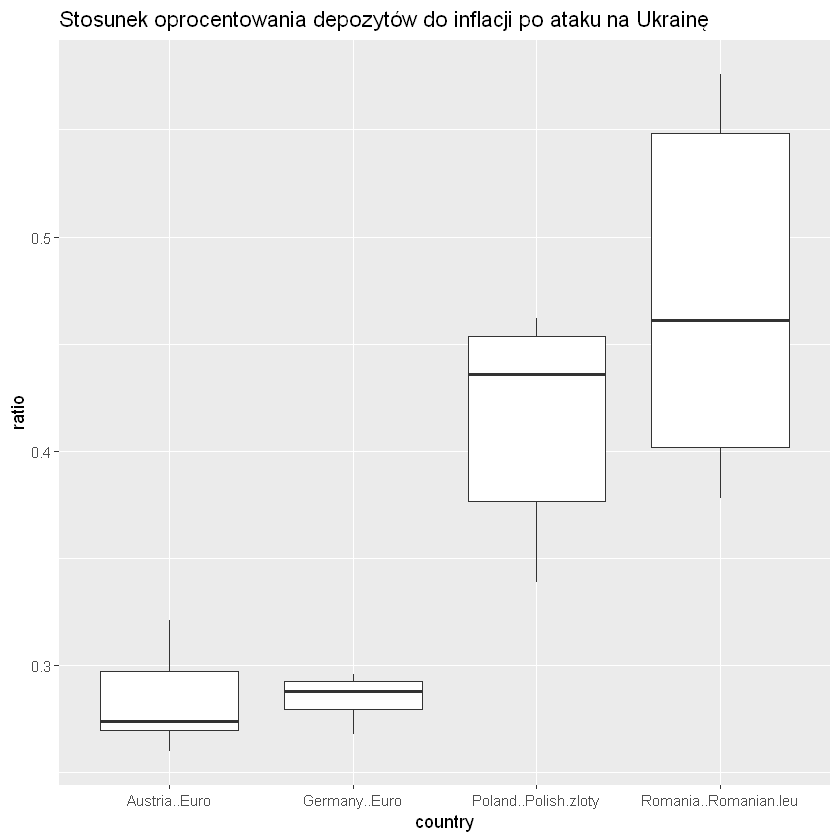

In [829]:
attack_on_ukraine %>%
    ggplot(aes(country, ratio))+
    geom_boxplot()+
    ggtitle("Stosunek oprocentowania depozytów do inflacji po ataku na Ukrainę")

### Problem 1.3 - Stability of inflation

In [830]:
# Importing data
inf_data <- read.csv("data/EU_Inflation_HICP_data_mod.csv", header = TRUE, sep = ",")
dep_data <- read.csv("data/EU_deposits_1yr_data_mod.csv", header = TRUE, sep = ",")

# Converting date features
inf_data$Period <- as.Date(inf_data$Period,
                                 format = "%d/%m/%Y")

dep_data$Period <- as.Date(dep_data$Period,
                               format = "%d/%m/%Y")


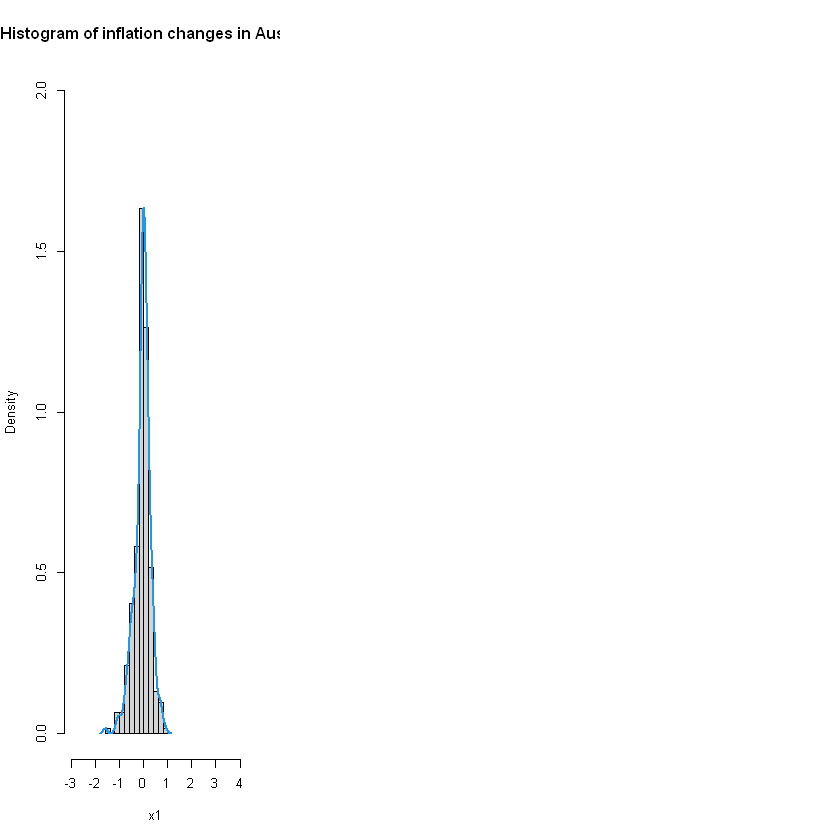

In [831]:
par(mfrow=c(1,3))
data_austria = as.data.frame(inf_data$Austria)
austra_inflacja <- data_austria %>% mutate(inflacja_bezwzgledna = (inf_data$Austria-lag(inf_data$Austria)), inflacja_wzgledna = (inf_data$Austria-lag(inf_data$Austria))*100/lag(inf_data$Austria))

x1 <- austra_inflacja$inflacja_bezwzgledna
x1 <- na.omit(x1)
hist(x1, prob = TRUE, main = "Histogram of inflation changes in Austria", ylim = c(0,2), xlim = c(-3,4))
lines(density(x1), col = 4, lwd = 2)

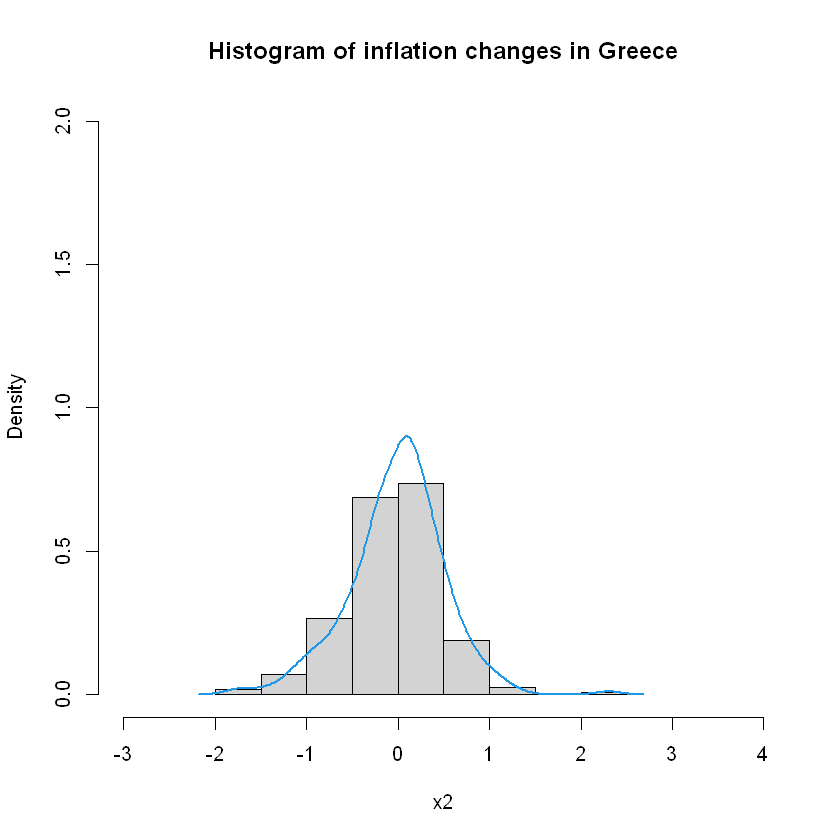

In [832]:
data_greece = as.data.frame(inf_data$Greece)
greece_inflacja <- data_greece %>% mutate(inflacja_bezwzgledna = (inf_data$Greece-lag(inf_data$Greece)), inflacja_wzgledna = (inf_data$Greece-lag(inf_data$Greece))*100/lag(inf_data$Greece))

x2 <- greece_inflacja$inflacja_bezwzgledna
x2 <- na.omit(x2)
hist(x2, prob = TRUE, main = "Histogram of inflation changes in Greece", ylim = c(0,2), xlim = c(-3,4))
lines(density(x2), col = 4, lwd = 2)

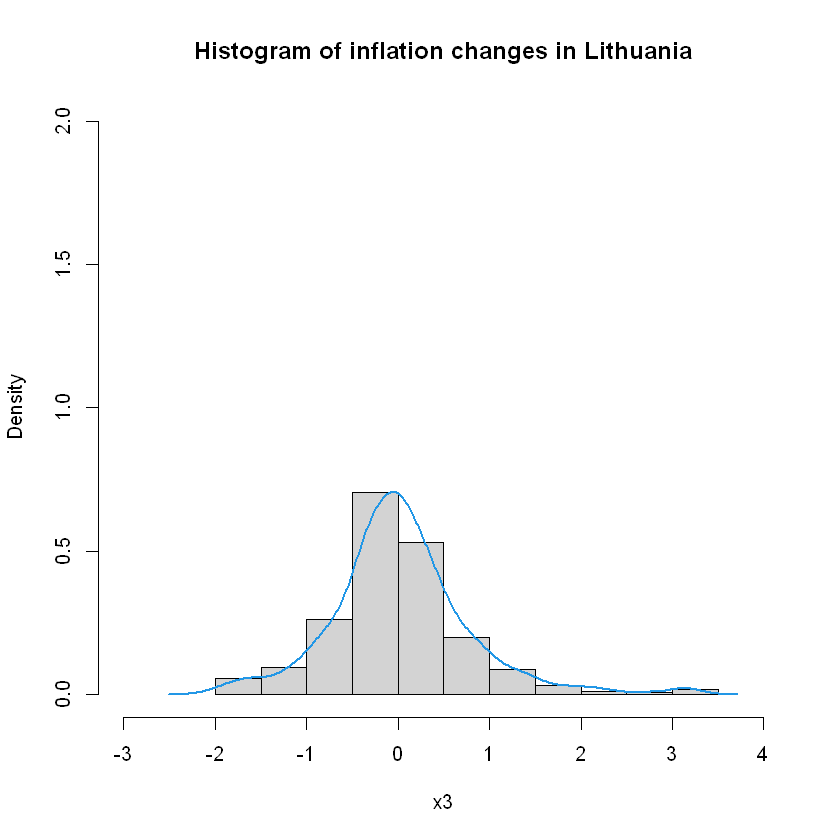

In [833]:
data_lit = as.data.frame(inf_data$Lithuania)
lit_inflacja <- data_lit %>% mutate(inflacja_bezwzgledna = (inf_data$Lithuania-lag(inf_data$Lithuania)), inflacja_wzgledna = (inf_data$Lithuania-lag(inf_data$Lithuania))*100/lag(inf_data$Lithuania))

x3 <- lit_inflacja$inflacja_bezwzgledna
x3 <- na.omit(x3)
hist(x3, prob = TRUE, main = "Histogram of inflation changes in Lithuania", ylim = c(0,2), xlim = c(-3,4))
lines(density(x3), col = 4, lwd = 2)

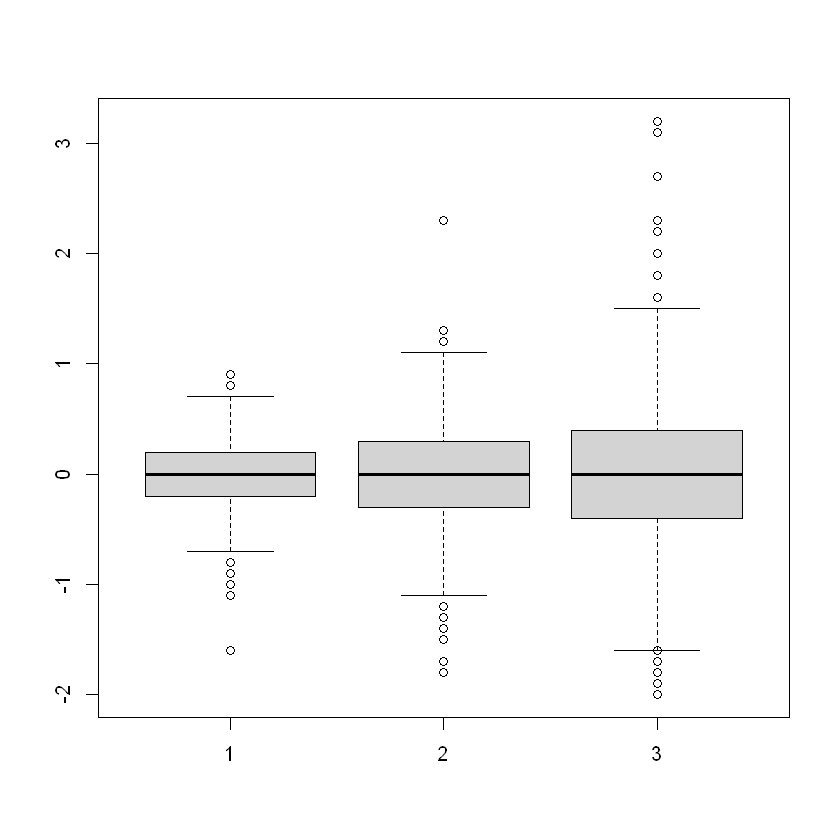

In [834]:
boxplot(x1,x2,x3)

### Problem 2 - Beer prices vs inflation

In [835]:
options(readr.show_col_types = FALSE)

beer_data <- read_csv("data/beer.csv", skip=2)
colnames(beer_data) <- make.names(colnames(beer_data))
colnames(beer_data)[1] <- "Period"

beer_data <- as.data.frame(beer_data[c(-1, -2), ])
beer_data[ ,-1] <- as.data.frame(sapply(beer_data[ ,-1], as.numeric))
beer_data$Period = inf_data$Period[1:322]

euro_zone_beer <-beer_data[ , c(1:3,5,8,10:14,17:23,25,28,29)]
not_euro_zone_beer <-beer_data[ , c(1,4,6,9,15,16,24,26,27)]

euro_zone_beer$EuroZoneMean <- rowMeans(euro_zone_beer[ ,-1], na.rm = TRUE)
not_euro_zone_beer$NotEuroZoneMean <- rowMeans(not_euro_zone_beer[ ,-1], na.rm = TRUE)
euro_zone_beer$EuroZoneSd <- apply(euro_zone_beer[ ,c(2:20)],1,sd)
not_euro_zone_beer$NotEuroZoneSd <- apply(not_euro_zone_beer[ ,c(2:9)],1,sd)

one_data_frame <- merge(x = euro_zone_beer[ , c(1,21,22)], y = not_euro_zone_beer[ , c(1,10,11)], by = "Period", all = TRUE)
one_data_frame <-one_data_frame[rev(order(one_data_frame$Period)), ]

head(euro_zone_beer, 3)
head(not_euro_zone_beer, 3)

New names:
• `` -> `...1`


,Period,Austria,Belgium,Cyprus,Germany,Estonia,Spain,Finland,France,Greece,⋯,Lithuania,Luxembourg,Latvia,Malta,Netherlands,Portugal,Slovenia,Slovakia,EuroZoneMean,EuroZoneSd
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022-10-01,120.92,122.81,85.45,119.2,152.40,118.02,114.91,110.51,126.96,⋯,162.38,119.13,126.77,117.00,119.66,102.57,113.80,111.44,119.1700,16.45206
2,2022-09-01,121.15,120.31,83.77,118.7,146.56,116.68,114.65,108.75,126.05,⋯,159.70,115.85,124.03,115.50,118.85,101.31,113.29,108.03,117.4305,15.84033
3,2022-08-01,119.39,118.95,82.02,115.2,146.14,116.11,113.39,108.81,124.81,⋯,158.52,118.01,128.03,115.48,116.86,101.80,111.76,107.82,116.7737,15.99547


,Period,Bulgaria,Czech.Republic,Denmark,Croatia,Hungary,Poland,Romania,Sweden,NotEuroZoneMean,NotEuroZoneSd
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022-10-01,113.84,126.1,114.6,111.46,142.38,124.3,120.77,109.34,120.3487,10.756108
2,2022-09-01,112.75,124.1,113.1,110.94,138.45,122.7,120.11,109.00,118.8937,9.695215
3,2022-08-01,109.59,123.4,112.0,112.09,137.45,121.5,119.15,106.43,117.7013,9.970256


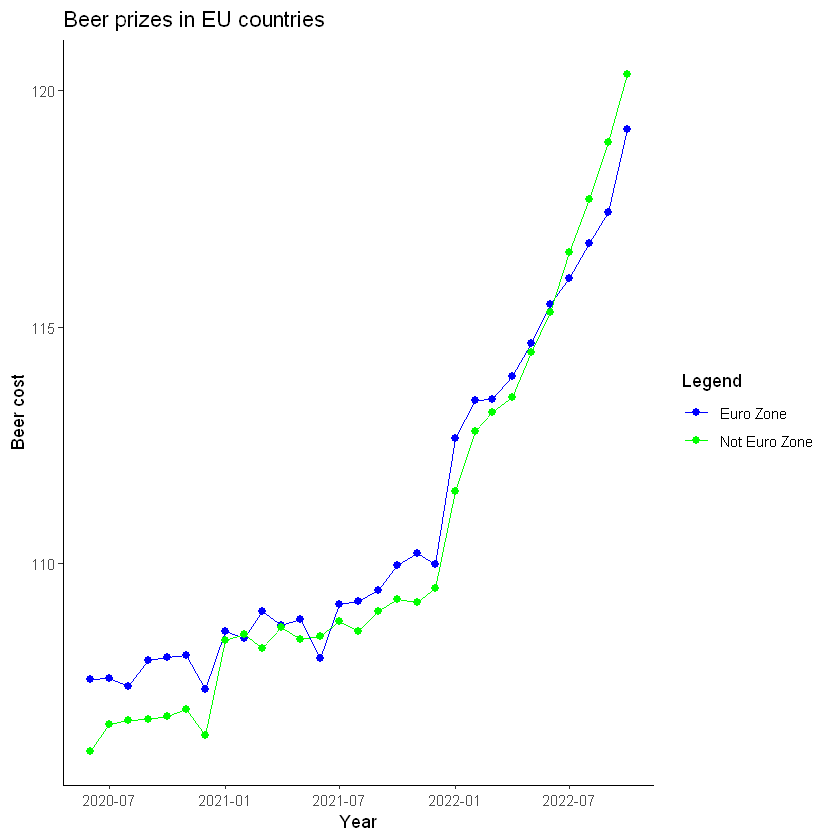

In [836]:
#Ostatnie lata ,ceny piwa
last_years = one_data_frame[1:29, ]

ggplot(data = last_years) + 
  geom_point(size = 2, aes(x=Period, y=EuroZoneMean, colour = "Euro Zone")) + geom_line(aes(x=Period, y=EuroZoneMean, colour = "Euro Zone")) +
  geom_point(size = 2, aes(x=Period, y=NotEuroZoneMean, colour = "Not Euro Zone")) + geom_line(aes(x=Period, y=NotEuroZoneMean, colour = "Not Euro Zone")) +
  theme_classic() +labs(title = "Beer prizes in EU countries", x = "Year", y = "Beer cost", colour = "Legend") +
  scale_color_manual(values = colors)

In [837]:
#Ciekawe lata, gdzie ceny piwa w krajach spoza strefy euro były wyższe niż tych w strefie euro, 
# jest to po dużym skoku inflacyjnym, moze to jest tym spowodowane?
interesting_years = one_data_frame[90:170, ]
interesting_years_inf = inf_data_2[90:170, ]
interesting_years <- interesting_years[seq(1, nrow(interesting_years), 3), ]
interesting_years_inf <- interesting_years_inf[seq(1, nrow(interesting_years_inf), 3), ]

In [838]:
interesting_years = interesting_years[17:27, ]
interesting_years_inf = interesting_years_inf[17:27, ]

In [839]:
#Wykresy inflacji i cen piwa w tych interesujących latach, jak to się do siebie ma?
plot1 <- ggplot(data = interesting_years) + 
  geom_point(size = 2, aes(x=Period, y=EuroZoneMean, colour = "Euro Zone")) + geom_line(aes(x=Period, y=EuroZoneMean, colour = "Euro Zone")) +
  geom_point(size = 2, aes(x=Period, y=NotEuroZoneMean, colour = "Not Euro Zone")) + geom_line(aes(x=Period, y=NotEuroZoneMean, colour = "Not Euro Zone")) +
  theme_classic() +labs(title = "Beer prizes in EU countries", x = "Year", y = "Beer cost", colour = "Legend") 

plot2 <- ggplot(data = interesting_years_inf) + 
  geom_point(size = 2, aes(x=Period, y=EuroZoneMean, colour = "Euro Zone")) + geom_line(aes(x=Period, y=EuroZoneMean, colour = "Euro Zone")) +
  geom_point(size = 2, aes(x=Period, y=NotEuroZoneMean, colour = "Not Euro Zone")) + geom_line(aes(x=Period, y=NotEuroZoneMean, colour = "Not Euro Zone")) +
  theme_classic() +labs(title = "Inflation in  EU countries", x = "Year", y = "Inflation rate", colour = "Legend") +
  scale_color_manual(values = colors) + geom_hline(yintercept=0.04, linetype="dashed", color = "blue") + 
  geom_hline(yintercept=3.36, linetype="dashed", color = "blue") + geom_hline(yintercept=2.5, linetype="dashed", color = "green") +
  geom_hline(yintercept=3.65, linetype="dashed", color = "green")

  


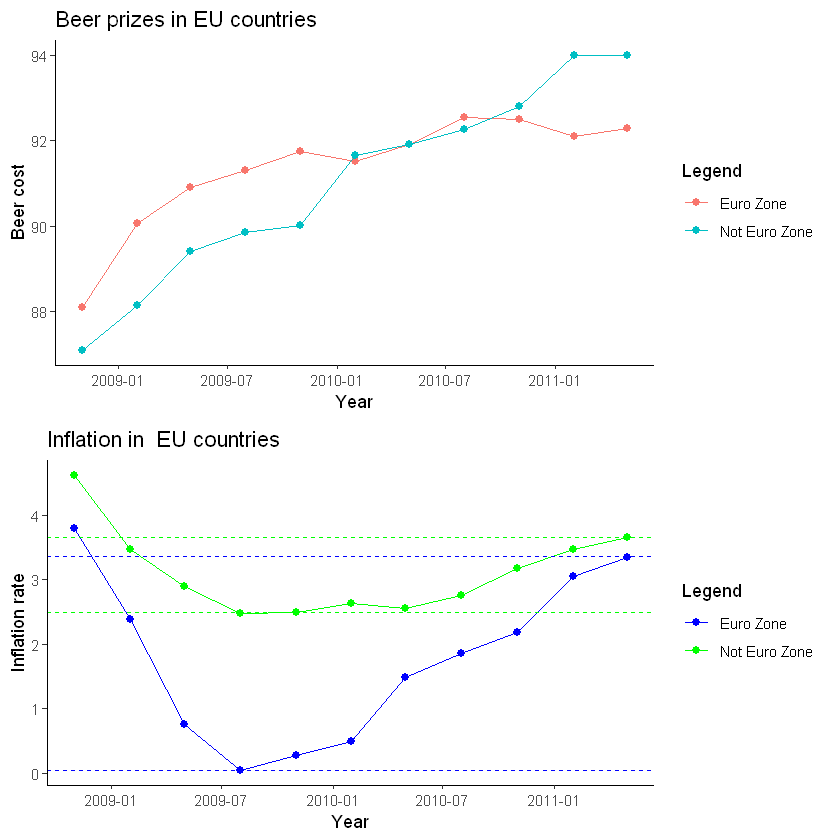

In [840]:
grid.arrange(plot1, plot2, nrow=2)

beer_data_2 = beer_data[1:120,-1]
beer_data_2 = beer_data_2[ ,-6]
inf_data_2 = inf_data[1:120,-1]
inf_data_2 = inf_data_2[ ,-6]

In [841]:
#Policzenie średnich, odchyleń standardowych i rozstępów międzykwartylowych dla cen piwa i inflacji
beer_prices = beer_data_2[1:6, ]
for( i in 1:ncol(beer_data_2)){
  beer_prices[1,i] = mean(beer_data_2[ , i], na.rm = TRUE)
  beer_prices[2,i] = sd(beer_data_2[ , i], na.rm = TRUE)
  beer_prices[3,i] = IQR(beer_data_2[ , i], na.rm = TRUE)
  beer_prices[4,i] = mean(inf_data_2[ , i], na.rm = TRUE)
  beer_prices[5,i] = sd(inf_data_2[ , i], na.rm = TRUE)
  beer_prices[6,i] = IQR(inf_data_2[ , i], na.rm = TRUE)
}

In [842]:
beer_prices

,Austria,Belgium,Bulgaria,Cyprus,Czech.Republic,Germany,Denmark,Estonia,Spain,Finland,⋯,Luxembourg,Latvia,Malta,Netherlands,Poland,Portugal,Romania,Sweden,Slovenia,Slovakia
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,105.133333,104.570000,99.276000,91.083333,106.747500,103.020000,104.043333,119.688417,102.261083,103.819583,⋯,104.180583,107.566083,104.000667,102.968500,103.734167,98.917250,102.761500,100.981833,102.138667,100.726250
2,7.491293,7.392231,3.202053,7.344824,8.111968,5.034479,3.554208,20.537683,4.676153,4.796947,⋯,6.196435,9.540963,4.998882,4.889537,5.996855,3.845465,5.541416,3.748059,3.307959,2.193335
3,10.972500,8.587500,2.565000,12.622500,11.600000,6.925000,4.950000,38.000000,6.590000,7.110000,⋯,9.135000,17.197500,8.017500,3.265000,8.100000,4.250000,6.870000,4.217500,3.082500,2.467500
4,2.261667,2.253333,1.668067,0.752500,2.757983,1.921667,1.232773,3.454167,1.539167,1.548333,⋯,1.920833,2.645000,1.525000,2.304167,2.357983,1.200833,2.809244,1.719328,1.634167,2.226667
5,2.011654,2.745016,3.715404,2.719891,3.603000,2.260742,2.124598,5.429965,2.669790,1.850459,⋯,2.418378,4.720167,1.489924,3.221602,3.441065,2.200897,3.226374,1.899388,2.659358,3.191552
6,1.100000,1.400000,3.450000,2.300000,2.000000,1.200000,0.750000,3.300000,2.525000,1.300000,⋯,2.125000,2.825000,0.900000,2.200000,3.200000,1.200000,3.350000,1.400000,2.300000,2.800000


In [843]:
#Sprawdzenie w których krajach mają poszczególne wiersze minimalne wartości
print(paste("min beer mean -> ", colnames(beer_prices)[which.min(beer_prices[1, ])],  " -> ", round(min(beer_prices[1, ]), digits = 2))) 
print(paste("min beer std -> ", colnames(beer_prices)[which.min(beer_prices[2, ])],  " -> ", round(min(beer_prices[2, ]), digits = 2))) 
print(paste("min beer IQR -> ", colnames(beer_prices)[which.min(beer_prices[3, ])],  " -> ", round(min(beer_prices[3, ]), digits = 2))) 
print(paste("min inf mean -> ", colnames(beer_prices)[which.min(beer_prices[4, ])],  " -> ", round(min(beer_prices[4, ]), digits = 2))) 
print(paste("min inf std -> ", colnames(beer_prices)[which.min(beer_prices[5, ])],  " -> ", round(min(beer_prices[5, ]), digits = 2))) 
print(paste("min inf IQR -> ", colnames(beer_prices)[which.min(beer_prices[6, ])],  " -> ", round(min(beer_prices[6, ]), digits = 2))) 


[1] "min beer mean ->  Cyprus  ->  91.08"
[1] "min beer std ->  Italy  ->  1.62"
[1] "min beer IQR ->  Italy  ->  1.3"
[1] "min inf mean ->  Greece  ->  0.64"
[1] "min inf std ->  Malta  ->  1.49"
[1] "min inf IQR ->  Denmark  ->  0.75"


In [586]:
#Sprawdzenie w których krajach mają poszczególne wiersze minimalne wartości
print(paste("max beer mean -> ", colnames(beer_prices)[which.max(beer_prices[1, ])],  " -> ", round(max(beer_prices[1, ]), digits = 2))) 
print(paste("max beer std -> ", colnames(beer_prices)[which.max(beer_prices[2, ])],  " -> ", round(max(beer_prices[2, ]), digits = 2))) 
print(paste("max beer IQR -> ", colnames(beer_prices)[which.max(beer_prices[3, ])],  " -> ", round(max(beer_prices[3, ]), digits = 2))) 
print(paste("max inf mean -> ", colnames(beer_prices)[which.max(beer_prices[4, ])],  " -> ", round(max(beer_prices[4, ]), digits = 2))) 
print(paste("max inf std -> ", colnames(beer_prices)[which.max(beer_prices[5, ])],  " -> ", round(max(beer_prices[5, ]), digits = 2))) 
print(paste("max inf IQR -> ", colnames(beer_prices)[which.max(beer_prices[6, ])],  " -> ", round(max(beer_prices[6, ]), digits = 2))) 


[1] "max beer mean ->  Lithuania  ->  123.25"
[1] "max beer std ->  Estonia  ->  20.54"
[1] "max beer IQR ->  Estonia  ->  38"
[1] "max inf mean ->  Estonia  ->  3.45"
[1] "max inf std ->  Estonia  ->  5.43"
[1] "max inf IQR ->  Bulgaria  ->  3.45"


In [587]:
# inflation mean for Cyprus
print(paste("inflation mean for Cyprus -> " , round(beer_prices["Cyprus"][4, ], digits=2)))

# beer price mean for Greece
print(paste("beer mean for Greece -> " , round(beer_prices["Greece"][1, ], digits=2)))

# inflation mean for Lithuania
print(paste("inflation mean for Lithuania -> " , round(beer_prices["Lithuania"][4, ], digits=2)))

# beer price mean for Estonia  
print(paste("beer mean for Estonia -> " , round(beer_prices["Estonia"][1, ], digits=2)))

[1] "inflation mean for Cyprus ->  0.75"
[1] "beer mean for Greece ->  110.58"
[1] "inflation mean for Lithuania ->  3.14"
[1] "beer mean for Estonia ->  119.69"
